In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Answer the following questions based on data preprocessing, visualization, correlation,
feature engineering, and using any 3 machine learning models for classification of your
choice. (Do not use deep learning models)


#### Explore some of the following research questions:
1) Can survey questions asked from the CDC provide accurate predictions of whether
an individual has diabetes? Do you recommend additional features in the data?
2) What risk factors are most predictive of diabetes risk?
3) Can we use a subset of the risk factors to accurately predict whether an individual
has diabetes?
4) What machine learning models are best for classifying the disease? Compare
models and explain why a model performed better based on the confusion matrix and
minimizing false negatives.


In [4]:
data = pd.read_csv("diabetes_binary_classification_data.csv")
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Splitting data into features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


1) Can survey questions asked from the CDC provide accurate predictions of whether
an individual has diabetes? Do you recommend additional features in the data?


<span style="color: rgb(100, 200, 100);">The CDC survey includes numerous features. Additional factors that could be considered are sleep patterns and family history of diabetes.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)
# xgb_pred = xgb.predict(X_test)

# Evaluate the models
print("Logistic Regression")
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

print("Random Forest")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# print("XGBoost")
# print(confusion_matrix(y_test, xgb_pred))
# print(classification_report(y_test, xgb_pred))


Logistic Regression
[[42775   964]
 [ 5840  1157]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

Random Forest
[[42402  1337]
 [ 5778  1219]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



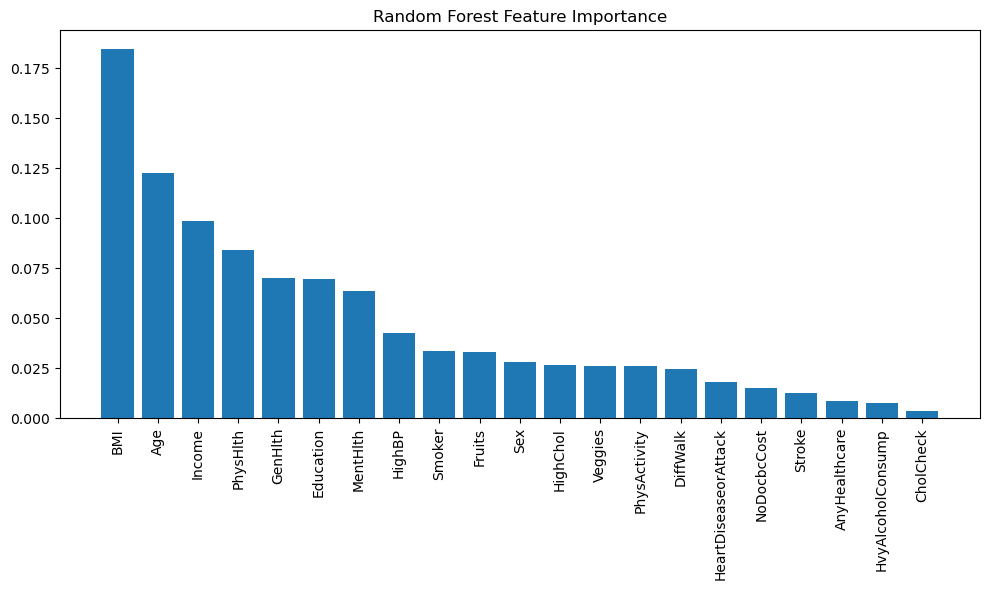

In [11]:
import matplotlib.pyplot as plt

# Feature Importance for Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.title('Random Forest Feature Importance')
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Feature Importance for XGBoost
# importances_xgb = xgb.feature_importances_
# indices_xgb = np.argsort(importances_xgb)[::-1]

# plt.figure(figsize=(10,6))
# plt.title('XGBoost Feature Importance')
# plt.bar(range(X_train.shape[1]), importances_xgb[indices_xgb], align='center')
# plt.xticks(range(X_train.shape[1]), X.columns[indices_xgb], rotation=90)
# plt.tight_layout()
# plt.show()
